In [198]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [113]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [114]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [19]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    return 1/len(y)*sum((y-tx.dot(w))**2)

5388.9667317741705

# 2 Grid Search

Fill in the function `grid_search()` below:

In [22]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i, j] = compute_loss(y, tx, [w0[i], w1[j]])
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356506, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.252 seconds


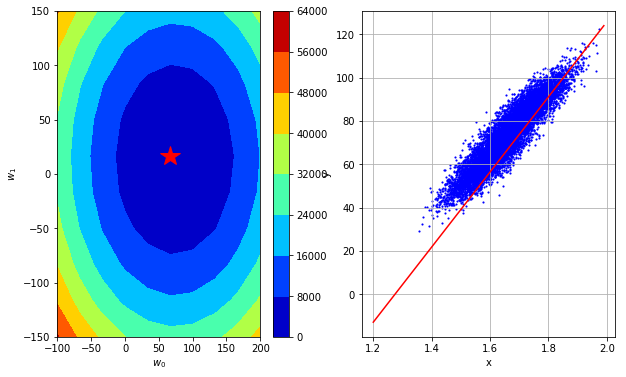

In [28]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [163]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    return -1/len(y)*tx.transpose().dot(y-tx.dot(w))

Please fill in the functions `gradient_descent` below:

In [95]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        w = w - gamma*compute_gradient(y, tx, w)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [117]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=5584.473425518329, w0=36.64696100105252, w1=6.739856217494568
Gradient Descent(1/49): loss=1419.1971881828288, w0=54.970441501578875, w1=10.109784326241765
Gradient Descent(2/49): loss=377.87812884895067, w0=64.13218175184201, w1=11.794748380615395
Gradient Descent(3/49): loss=117.54836401548246, w0=68.71305187697361, w1=12.637230407802221
Gradient Descent(4/49): loss=52.46592280711479, w0=71.0034869395394, w1=13.058471421395632
Gradient Descent(5/49): loss=36.19531250502271, w0=72.1487044708223, w1=13.269091928192339
Gradient Descent(6/49): loss=32.12765992949983, w0=72.72131323646374, w1=13.374402181590693
Gradient Descent(7/49): loss=31.11074678561917, w0=73.00761761928447, w1=13.42705730828987
Gradient Descent(8/49): loss=30.85651849964895, w0=73.15076981069483, w1=13.453384871639459
Gradient Descent(9/49): loss=30.792961428156346, w0=73.22234590640001, w1=13.466548653314254
Gradient Descent(10/49): loss=30.777072160283275, w0=73.2581339542526, w1=13.47

In [80]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

Knowing the optimal values ([w0, w1] ~ [73, 13]), compute the gradients for [w0, w1] = [100, 20] and [50, 10] to get some intuition about its values.

[26.706078    6.52028757] [-23.293922    -3.47971243]


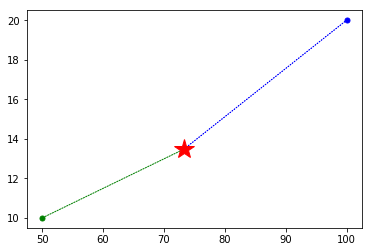

In [69]:
weights = np.array([[100,20], [50, 10]])

grad_1 = compute_gradient(y, tx, weights[0])
grad_2 = compute_gradient(y, tx, weights[1])
print(grad_1, grad_2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(73.29, 13.48, marker='*', color='r', markersize=20)
ax.plot(weights[0][0], weights[0][1], marker='.', color='b', markersize=10)
ax.plot(weights[1][0], weights[1][1], marker='.', color='g', markersize=10)
ax.arrow(weights[0][0], weights[0][1], -grad_1[0], -grad_1[1], color='b', linestyle='dotted')
ax.arrow(weights[1][0], weights[1][1], -grad_2[0], -grad_2[1], color='g', linestyle='dotted')

# 4 Stochastic gradient descent

In [122]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    return -1/len(y)*tx.transpose().dot(y-tx.dot(w))


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    n_iter = 0
    for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=max_iters):
        loss = compute_loss(minibatch_y, minibatch_tx, w)
        w = w - gamma*compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [131]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.07
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=9189.852652884885, w0=6.710460341819773, w1=9.068783314797296
Gradient Descent(0/49): loss=3497.817598765275, w0=10.850424862676183, w1=8.610627522112914
Gradient Descent(0/49): loss=3623.2173599339944, w0=15.063946556423183, w1=8.67037722500419
Gradient Descent(0/49): loss=3766.322515985683, w0=19.359872571653177, w1=10.037466667332186
Gradient Descent(0/49): loss=3745.073249595215, w0=23.64366282363991, w1=9.140381271250936
Gradient Descent(0/49): loss=3693.6464580539605, w0=27.897939218570592, w1=15.29044261296594
Gradient Descent(0/49): loss=1890.1868325681598, w0=30.941278746060746, w1=11.461984605511367
Gradient Descent(0/49): loss=2009.6489307630584, w0=34.07931631128188, w1=11.427233340596773
Gradient Descent(0/49): loss=1624.976111423619, w0=36.901085782017525, w1=13.395327960486439
Gradient Descent(0/49): loss=1949.0485383374016, w0=39.991447870487626, w1=13.843671771423441
Gradient Descent(0/49): loss=1101.02527090029, w0=42.314166929567186, w1=1

In [132]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot sampled data. Then train a linear model with MSE loss as before.

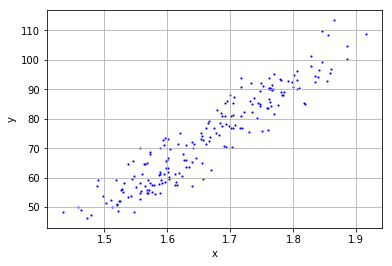

In [179]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(height, weight, marker=".", color='b', s=5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()

Gradient Descent(0/49): loss=5658.544448876835, w0=36.81613622986556, w1=7.237852438218638
Gradient Descent(1/49): loss=1435.101264436491, w0=55.22420434479835, w1=10.856778657327911
Gradient Descent(2/49): loss=379.2404683264057, w0=64.42823840226474, w1=12.666241766882523
Gradient Descent(3/49): loss=115.27526929888518, w0=69.03025543099793, w1=13.57097332165982
Gradient Descent(4/49): loss=49.283969542005245, w0=71.33126394536453, w1=14.023339099048462
Gradient Descent(5/49): loss=32.78614460278527, w0=72.48176820254783, w1=14.24952198774278
Gradient Descent(6/49): loss=28.661688367980275, w0=73.05702033113947, w1=14.362613432089937
Gradient Descent(7/49): loss=27.630574309279027, w0=73.34464639543529, w1=14.419159154263514
Gradient Descent(8/49): loss=27.37279579460375, w0=73.48845942758321, w1=14.447432015350303
Gradient Descent(9/49): loss=27.308351165934923, w0=73.56036594365716, w1=14.461568445893699
Gradient Descent(10/49): loss=27.292240008767685, w0=73.59631920169414, w1=14.

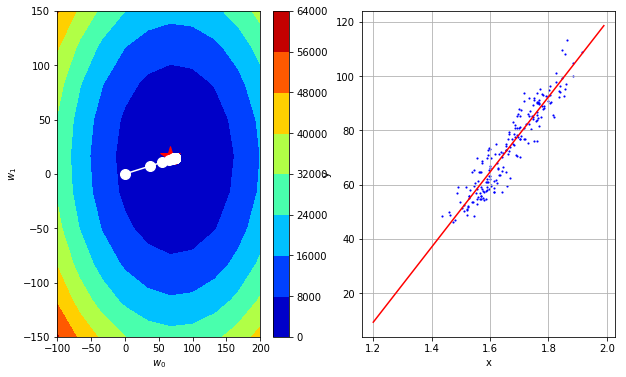

In [181]:
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, max_iters)
fig.set_size_inches(10.0, 6.0)

Load data containing outliers, plot it and train a linear model with MSE. Note that outliers are not representative and thus the achieved model doesn't represent the data.

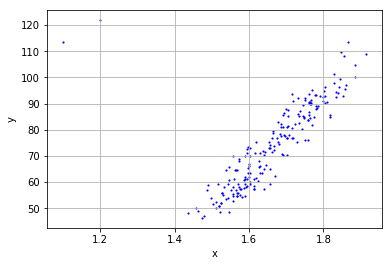

In [182]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(height, weight, marker=".", color='b', s=5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()

Gradient Descent(0/49): loss=5739.6702290717085, w0=37.03390292746318, w1=5.517447432994598
Gradient Descent(1/49): loss=1533.813652421832, w0=55.550854391194775, w1=8.27617114949187
Gradient Descent(2/49): loss=482.34950825936244, w0=64.80933012306056, w1=9.655533007740495
Gradient Descent(3/49): loss=219.4834722187458, w0=69.43856798899347, w1=10.345213936864804
Gradient Descent(4/49): loss=153.76696320859153, w0=71.75318692195992, w1=10.690054401426956
Gradient Descent(5/49): loss=137.3378359560529, w0=72.91049638844315, w1=10.86247463370803
Gradient Descent(6/49): loss=133.23055414291827, w0=73.48915112168476, w1=10.948684749848567
Gradient Descent(7/49): loss=132.20373368963462, w0=73.77847848830557, w1=10.991789807918835
Gradient Descent(8/49): loss=131.9470285763137, w0=73.92314217161596, w1=11.013342336953968
Gradient Descent(9/49): loss=131.88285229798353, w0=73.99547401327116, w1=11.024118601471534
Gradient Descent(10/49): loss=131.86680822840088, w0=74.03163993409876, w1=11.

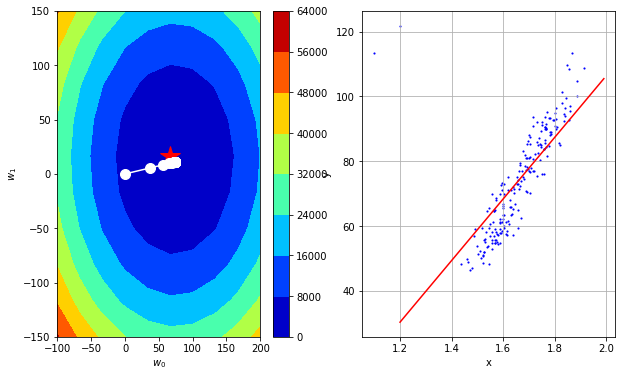

In [183]:
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, max_iters)
fig.set_size_inches(10.0, 6.0)

### Exercise 6

In [184]:
def compute_mae_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    return 1/len(y)*sum(np.abs(y-tx.dot(w)))

In [188]:
def compute_mae_gradient(y, tx, w):
    """Compute the gradient for mae loss."""
    return -1/len(y)*tx.transpose().dot([-1 if e<=0 else 1 for e in (y-tx.dot(w))])

In [189]:
def mae_gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_mae_loss(y, tx, w)
        w = w - gamma*compute_mae_gradient(y, tx, w)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Gradient Descent(0/74): loss=74.06780585492632, w0=1.9, w1=2.0049968286299855e-15
Gradient Descent(1/74): loss=72.16780585492634, w0=3.8, w1=4.009993657259971e-15
Gradient Descent(2/74): loss=70.26780585492641, w0=5.699999999999999, w1=6.014990485889956e-15
Gradient Descent(3/74): loss=68.36780585492637, w0=7.6, w1=8.019987314519942e-15
Gradient Descent(4/74): loss=66.46780585492641, w0=9.5, w1=1.0024984143149928e-14
Gradient Descent(5/74): loss=64.5678058549263, w0=11.4, w1=1.2029980971779914e-14
Gradient Descent(6/74): loss=62.667805854926364, w0=13.3, w1=1.40349778004099e-14
Gradient Descent(7/74): loss=60.7678058549264, w0=15.200000000000001, w1=1.6039974629039884e-14
Gradient Descent(8/74): loss=58.867805854926395, w0=17.1, w1=1.8044971457669868e-14
Gradient Descent(9/74): loss=56.9678058549264, w0=19.0, w1=2.0049968286299852e-14
Gradient Descent(10/74): loss=55.06780585492632, w0=20.9, w1=2.2054965114929837e-14
Gradient Descent(11/74): loss=53.16780585492637, w0=22.79999999999999

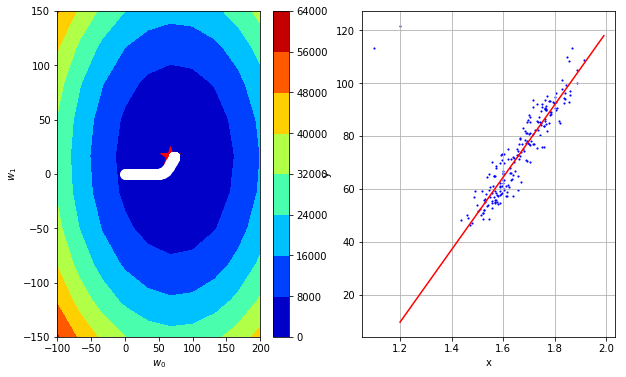

In [197]:
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# Define the parameters of the algorithm.
max_iters = 75
gamma = 1.9

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
mae_gradient_losses, mae_gradient_ws = mae_gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

fig = gradient_descent_visualization(
        mae_gradient_losses, mae_gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, max_iters)
fig.set_size_inches(10.0, 6.0)